In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import CategoricalNB

In [11]:
#1. Simular datos
np.random.seed(42)
n_samples = 10000

#variables independientes
precio = np.random.choice(['Alto', 'Medio', 'Bajo'], size=n_samples, p=[0.3, 0.4, 0.3])
criticas = np.random.choice(['Alta', 'Baja'], size=n_samples, p=[0.5, 0.5])
amigos = np.random.choice(['Sí', 'No'], size=n_samples, p=[0.4, 0.6])
compra = np.empty(n_samples, dtype=object)

In [12]:
# Generar la variable objetivo 'Compra' basada en probabilidades (Lógica Bayesiana)
for i in range(n_samples):
    prob_si = 0.5 
    if precio[i] == 'Bajo': prob_si += 0.2
    if precio[i] == 'Alto': prob_si -= 0.2
    if criticas[i] == 'Alta': prob_si += 0.15
    if amigos[i] == 'Sí': prob_si += 0.1
    
    # Ajuste de límites
    prob_si = max(0.05, min(0.95, prob_si))
    compra[i] = np.random.choice(['Sí', 'No'], p=[prob_si, 1-prob_si])

In [13]:
df = pd.DataFrame({
    'Precio': precio,
    'Criticas': criticas,
    'Amigos': amigos,
    'Compra': compra
})

In [14]:

encoder = OrdinalEncoder()
X = encoder.fit_transform(df[['Precio', 'Criticas', 'Amigos']])
y = df['Compra']

model = CategoricalNB()
model.fit(X, y)

,"alpha alpha: float, default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"min_categories min_categories: int or array-like of shape (n_features,), default=NoneMinimum number of categories per feature.- integer: Sets the minimum number of categories per feature to `n_categories` for each features.- array-like: shape (n_features,) where `n_categories[i]` holds the minimum number of categories for the ith column of the input.- None (default): Determines the number of categories automatically from the training data... versionadded:: 0.24",None


In [15]:
import itertools
categorias = [df['Precio'].unique(), df['Criticas'].unique(), df['Amigos'].unique()]
combinaciones = pd.DataFrame(list(itertools.product(*categorias)), 
                             columns=['Precio', 'Criticas', 'Amigos'])

X_comb = encoder.transform(combinaciones)
probs = model.predict_proba(X_comb)

combinaciones['P(Compra = No)'] = probs[:, 0]
combinaciones['P(Compra = Sí)'] = probs[:, 1]

print(combinaciones.round(3))

   Precio Criticas Amigos  P(Compra = No)  P(Compra = Sí)
0   Medio     Alta     No           0.350           0.650
1   Medio     Alta     Sí           0.260           0.740
2   Medio     Baja     No           0.497           0.503
3   Medio     Baja     Sí           0.392           0.608
4    Bajo     Alta     No           0.167           0.833
5    Bajo     Alta     Sí           0.116           0.884
6    Bajo     Baja     No           0.269           0.731
7    Bajo     Baja     Sí           0.194           0.806
8    Alto     Alta     No           0.546           0.454
9    Alto     Alta     Sí           0.441           0.559
10   Alto     Baja     No           0.688           0.312
11   Alto     Baja     Sí           0.591           0.409


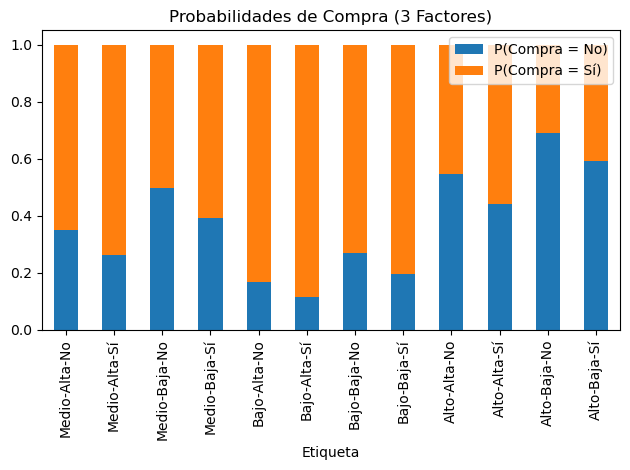

In [16]:
combinaciones['Etiqueta'] = combinaciones.apply(lambda r: f"{r['Precio']}-{r['Criticas']}-{r['Amigos']}", axis=1)
combinaciones.plot(x='Etiqueta', y=['P(Compra = No)', 'P(Compra = Sí)'], kind='bar', stacked=True)
plt.title('Probabilidades de Compra (3 Factores)')
plt.tight_layout()
plt.show()